# Predicting Chest Pain Type for Heart Disease Patients  based on their Resting Blood Pressure and Cholesterol Level

## Introduction

#### Background Information
Chest pain (angina)¹ is the most obvious symptom of heart disease. High   cholesterol and high blood pressure are major factors that induce chest pain because both affect coronary arteries that supply the heart with blood.

Research has shown that high cholesterol causes accumulation on the artery walls, further reduces artery blood flow, and causes complications like chest pain². Also, high blood pressure damages arteries by reducing elasticity, which decreases blood and oxygen flow to the heart, and leads to chest pain³. 

Scientists define cholesterol level above 240 mg/dl as high and dangerous⁴, and systolic pressure (artery pressure when heart beats) above 130mmHg as hypertension³. Blood pressure in this project is systolic pressure.



#### Dataset Description + Question we try to answer
In our project, we use the Cleveland database in the UCI Heart Disease Data Set ([Kaggle link to dataset](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download)). It contains 14 attributes and information supported by Cleveland Clinic Foundation. We aim to predict chest pain type for heart disease patients from their blood pressure and cholesterol values via classification. We choose these predictors because high cholesterol and high blood pressure can lead to chest pain as mentioned above, showing a correlation between these two factors and chest pain. We conclude that based on this correlation, these two factors would serve as good predictors for our classification problem. We have also considered ST depression (oldpeak) as a predictor, but during our research, we found the correlation between this factor and chest pain type to be inconclusive.

In [1]:
### UNCOMMENT WHEN RUNNING THIS NOTEBOOK FOR THE FIRST TIME, THEN COMMENT AGAIN TO SAVE RUNNING TIME
#install.packages("themis")

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(themis)
library(GGally)
library(ISLR)
library(ggplot2)
options(repr.matrix.max.rows = 6)
### Also set the seed
set.seed(2022)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### METHOD & RESULTS

#### EXPLORATORY DATA ANALYSIS

The original data set has 14 columns, which contains information about the patient's chest pain type along with other heart data. After our preliminary data analysis, we have decided that there are 4 columns that are relevant to our question. The following 4 columns and their definition (according to the website) are:
1. **cp**: Patient's chest pain type:
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
2. **trestbps**: Patient's resting blood pressure (in mmHg on admission to the hospital).
3. **chol**: Patient's serum cholesterol in mg/dl.
4. **condition**: Patient has heart disease (0 = no disease, 1 = disease).

For our exploratory analysis, we will first load the data in and turn all categorical variables into factors. Afterwards, we will filter the data for people who have a heart disease (condition == 1), before splitting the data into training data and testing data. Once we finished splitting, we can begin our exploratory analysis which includes evaluating the proportion of chest pain type (cp) in our training data, checking to see if there is any missing data and plotting the distribution of resting blood pressure (trestbps) for every type of cp using a histogram.

In [3]:
set.seed(2022)
### Code block
# Loading data
heart_cleveland_data <- read_csv("https://raw.githubusercontent.com/soph-ien/dsci_100_group143_project/main/heart_cleveland_upload.csv") |> 
                        mutate(across(c(sex:cp, fbs:restecg, exang, slope:condition), as_factor))

# Filtering for people with a heart condition
heart_cleveland_data_filter <- filter(heart_cleveland_data, condition == 1)

# Spliting the data into training and test data
heart_split <- initial_split(heart_cleveland_data_filter, prop = 0.75, strata = cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

# Investigate the proportion of each cp types in the training data
heart_proportion_train <- heart_train |> group_by(cp) |> summarize(n=n()) |> mutate(percent = 100*n/nrow(heart_train))

# Investigate if there's any missing values
heart_missing_data_train <- as_tibble(apply(heart_train, 2, is.na)) |> map_df(sum)

# Plotting the distribution of resting blood pressure for each type of chest pain via histograms
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_train_cp_plot <- heart_train |> ggplot(aes(x = trestbps, fill = cp)) +
                                        geom_histogram(bins = 25) +
                                        labs(x = "Resting blood pressure (mmHg)", y = "Number of patients", fill = "Chest pain type", title = "Figure 1: Distribution of trestbps among all patients") +
                                        theme(text = element_text(size = 15)) +
                                        scale_x_continuous(breaks = seq(90, 200, by = 10))

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: Cleveland UCI Heart data set for people with a heart condition"

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
59,1,0,170,288,0,2,159,0,0.2,1,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


[1] "Table 2: Chest pain type (cp) proportion"

cp,n,percent
<fct>,<int>,<dbl>
0,7,6.862745
1,6,5.882353
2,13,12.745098
3,76,74.509804


[1] "Table 3: Number of missing data"

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0


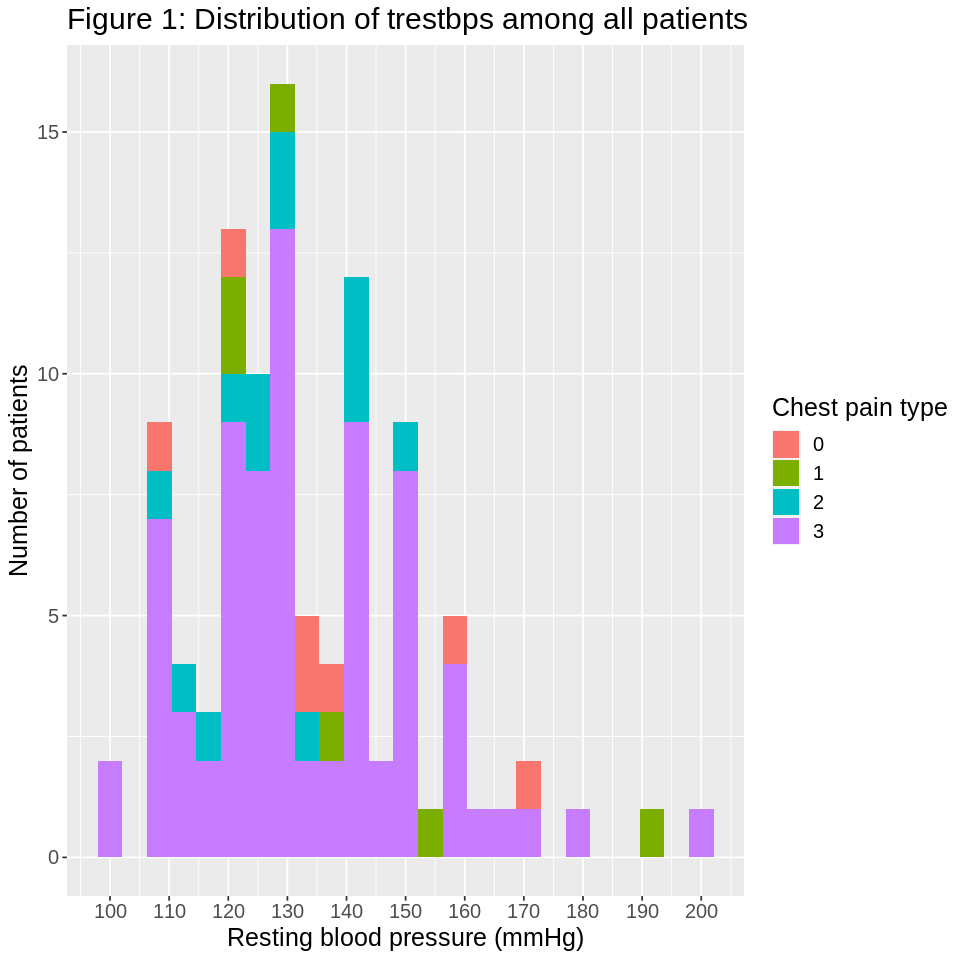

In [4]:
### Load block
paste("Table 1: Cleveland UCI Heart data set for people with a heart condition")
heart_cleveland_data_filter

paste("Table 2: Chest pain type (cp) proportion")
heart_proportion_train

paste("Table 3: Number of missing data")
heart_missing_data_train

heart_train_cp_plot

##### ***SUMMARY OF EXPLORATORY DATA ANALYSIS***:

In our training data, most patients have type 3 chest pain (asymptomatic, 74.51%), followed by type 2 (non-anginal pain, 12.75%), then type 0 (typical angina, 6.86%) and finally type 1 (atypical angina, 5.88%). There is an imbalance in the distribution for chest pain type, so we need to balance them before we start our classification as seen in Table 2. Next, we examine the presence of missing values in the training set. Results in Table 3 show there are no missing values, so no further steps are needed to remove them.

Lastly, to visualize patients number and their resting blood pressure (testpbs), we create a histogram with trestbps on x-axis and number of patients on y-axis. We color the chest pain type to emphasize the distribution across various values of RBP. From the histogram (Figure 1), most heart disease patients have RBP ranging from 110 to 150 mmHg. We also found the number of asymptomatic chest pain patients are broadly spread out with a range of 110-170 mmHg.

#### METHOD

Looking at the training data, we found that it was unbalanced and unscaled; to resolve this issue, we created a new recipe utilizing the cp and heart_train dataframe made previously using the initial_split function.

To rebalance the data by oversampling, the function step_upsample() from the themis package was used to give rare observations more voting power in K-nearest neighbor algorithm, a new balanced data frame, upscaled_data, was created. This became our new training data set for our model.

In [5]:
set.seed(2022)
# upscaling, making this the new training data
upscale_recipe <- recipe(cp ~ ., data = heart_train) |>
                step_upsample(cp, over_ratio = 1, skip = FALSE) |> prep()
upscaled_data <- upscale_recipe |> bake(heart_train)

upscaled_data_cp_prop <- upscaled_data |> group_by(cp) |> summarize(n=n()) |> mutate(percent = 100*n/nrow(upscaled_data))

paste("Table 4: Cleveland UCI Heart data set for people with a heart condition (upscaled)")
upscaled_data

paste("Table 5: Chest pain type (cp) proportion (after upscaling)")
upscaled_data_cp_prop

[1] "Table 4: Cleveland UCI Heart data set for people with a heart condition (upscaled)"

age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,cp
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
59,1,134,204,0,0,162,0,0.8,0,2,0,1,0
65,1,138,282,1,2,174,0,1.4,1,1,0,1,0
45,1,110,264,0,0,132,0,1.2,1,0,2,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
40,1,110,167,0,2,114,1,2.0,1,0,2,1,3
39,1,118,219,0,0,140,0,1.2,1,0,2,1,3
35,1,120,198,0,0,130,1,1.6,1,0,2,1,3


[1] "Table 5: Chest pain type (cp) proportion (after upscaling)"

cp,n,percent
<fct>,<int>,<dbl>
0,76,25
1,76,25
2,76,25
3,76,25


We see that the number of rows in our training data increased from 137 (Table 1) to 304 (Table 4). Additionally, we see that the proportion of each chest pain type is equal to each other (25%) as shown in Table 5. The training data has been successfully upscaled and the problem with imbalanced data is now resolved.

To begin making a model for our classification problem, we are interested in finding out which K value work best to maximize the accuracy of our model. To find the best K value, we specified the neighbors argument to be tune() in the model specification rather than giving it a particular value.

We performed cross-validation on the scaled training data (upscaled_data) to continue the process of finding the most optimal K. We decided to go with a 5-fold cross-validation, and when specified at most, 20 numbers of neighbors will be tried when tuning.

For our recipe, we scaled and centered the predictors (trestbps and chol) we chose from upscale_data into a new recipe named uc_recipe, and evaluated the classification result for each K value using workflow(). The results were collected via collect_metrics().

In [6]:
set.seed(2022)

# declaration of the max value of k used for tuning
max_k_val = 20
# create spec
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# cross-validation, 5 folds
heart_vfold <- vfold_cv(upscaled_data, v = 5, strata = cp)

k_vals <- tibble(neighbors = seq(from = 1, to = max_k_val))

# create the centering / scaling recipe
uc_recipe <- recipe(cp ~ trestbps + chol, data = upscaled_data) |>
              step_scale(all_predictors()) |>
              step_center(all_predictors())

knn_results <- workflow() |>
               add_recipe(uc_recipe) |>
               add_model(knn_spec) |>
               tune_grid(resamples = heart_vfold, grid = k_vals) |>
               collect_metrics()

We then filtered the prediction results to keep only the accuracy metrics. To better visualize the outcome, we plotted the accuracy for K values from 1 to 20 in a scatter-line plot.

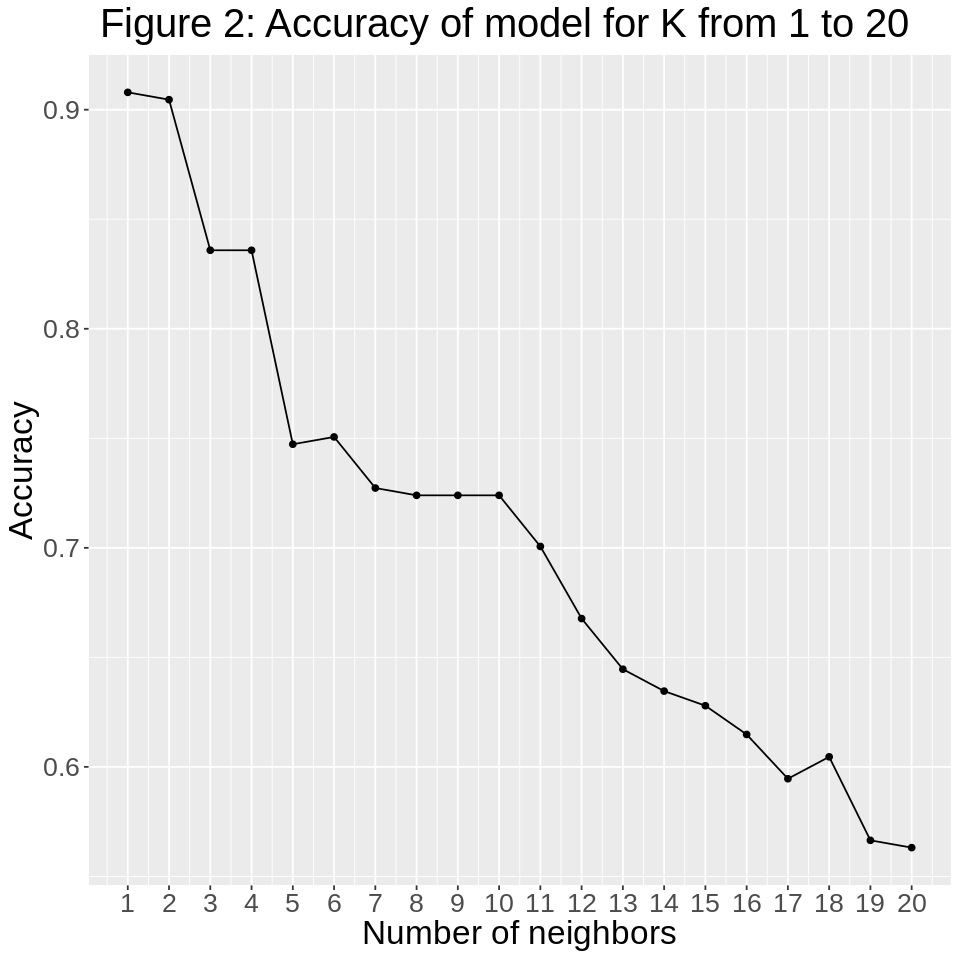

In [7]:
accuracies <- knn_results |> filter(.metric == "accuracy")


accuracies_plot <- accuracies |> ggplot(aes(x = neighbors, y = mean)) +
                                 labs(x = "Number of neighbors", y = "Accuracy", title = " Figure 2: Accuracy of model for K from 1 to 20") +
                                 geom_point() +
                                 geom_line() +
                                 scale_x_continuous(breaks = 1:max_k_val) +
                                 theme(text = element_text(size = 20))
accuracies_plot

Although K = 1 or K = 2 gives a higher accuracy in our prediction model, choosing such a small value of K may lead to overfitting. That is, the model predicts well on the training data but has poor performance when predicting on testing data instead.

To avoid overfitting, we picked a nearby K value, which slightly lowers the accuracy to low 80s. We created a new model specification with a specific K value (K = 4) to retrain our upscaled training data. This is our final classifier model.

In [8]:
set.seed(2022)
# Making final classifier
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
                 set_engine("kknn") |>
                 set_mode("classification")

knn_best_fit <- workflow() |>
                add_recipe(uc_recipe) |>
                add_model(knn_best_spec) |>
                fit(data = upscaled_data)


With the final classifier trained, we can see how well it is doing by predicting it on our test data, and get the accuracy of the model.

[1] "Table 6: Model accuracy metric"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4


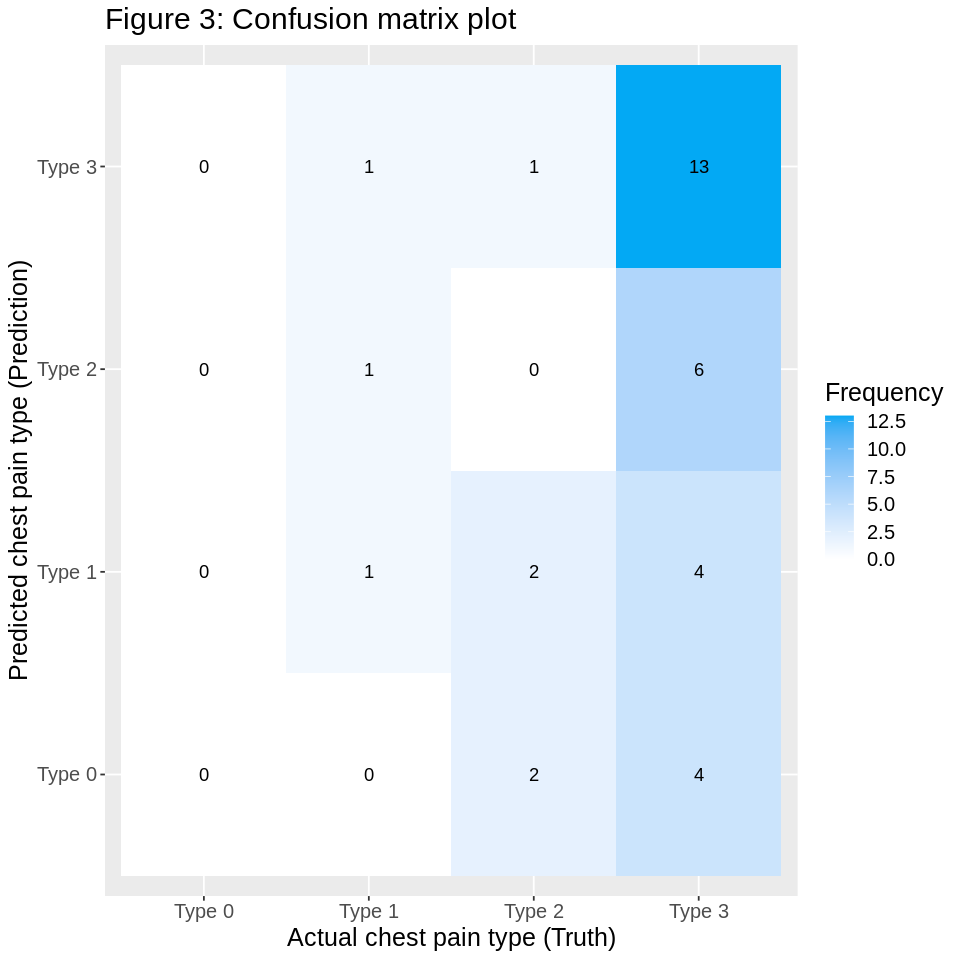

In [9]:
set.seed(2022)
# Predictions
heart_test_predictions <- predict(knn_best_fit, heart_test) |>
  bind_cols(heart_test)

# Getting metrics + confusion matrix
prediction_metrics <- heart_test_predictions |> 
                      metrics(truth = cp, estimate = .pred_class) |>
                      filter(.metric == "accuracy")
heart_confusion_matrix <- heart_test_predictions |>
             conf_mat(truth = cp, estimate = .pred_class)
heart_confusion_df <- as.data.frame(heart_confusion_matrix$table)

paste("Table 6: Model accuracy metric")
prediction_metrics

heart_matrix_plot <- heart_confusion_df |> ggplot(aes(x = Truth, y = Prediction, fill = Freq)) +
                                                labs(x = "Actual chest pain type (Truth)", y = "Predicted chest pain type (Prediction)", title = "Figure 3: Confusion matrix plot", fill = "Frequency") +
                                                geom_tile(aes(fill = Freq)) + geom_text(aes(label=Freq)) +
                                                scale_fill_gradient(low="white", high="#03a9f4") +
                                                scale_x_discrete(labels=c("Type 0","Type 1","Type 2","Type 3")) +
                                                scale_y_discrete(labels=c("Type 0","Type 1","Type 2","Type 3")) +
                                                theme(text = element_text(size = 15))
heart_matrix_plot

#### RESULTS

According to the ‘Model Accuracy Metric’ table shown above (Table 6), our final model has a 40% total accuracy in predicting patient chest pain type; although this accuracy seems low, the confusion matrix (Figure 3) allows us to look at the mistakes our model is making. We can see that the vast majority of errors come from misdiagnosing chest pain type 1 and 2. In contrast, the model correctly predicts type 3 correctly 13 times, indicating that it has the highest accuracy when diagnosing patients with asymptomatic pain. However, it should be noted that the 13 correct predictions are out of 27 total predictions for type 3, so our model isn’t very accurate with type 3 predictions either. It is also noteworthy that since there is no data about patients with chest pain type 0 in the testing set, we have no information on whether or not the model could have predicted type 0 correctly. 

### DISCUSSION

In our group proposal, we stated that we expected to see patients with high RBP and cholesterol to have a chest pain type of either 0, 1, or 3. We also stated that patients with low RBP and low cholesterol should have a chest pain type of either 0, 2, or 3. However, due to the fact that our model frequently misdiagnoses chest pain types 1, 2 and 3, we can’t say that our outcome matches our expectations. The fact that these chest pain types are often misdiagnosed to be type 3 also indicates that asymptomatic chest pain presents with such a variety of “symptoms” that it makes it difficult for our model to correctly predict the other chest pain types. The results of our model are also different due to the pivots we made while creating it, such as upscaling our data. Not having any type 0 in our testing data may have an influence on our model's accuracy as well.

Despite our low model accuracy, our findings could have a plethora of uses particularly in the medical field; doctors could potentially use this model to diagnose patients’ chest pain types. This would be especially useful for those with asymptomatic pain, as it’s difficult to diagnose someone without symptoms and our model most accurately predicts that type of chest pain. This model could also assist patients who have chest pain but are unsure of whether to visit a more specialized doctor; although the model will most often recommend seeing one, it facilitates a safer approach given how malignant heart diseases can be. 

Future questions involve the data set itself; are there other predictors that could more accurately predict chest pain type (that aren’t included in the given dataset)? And if so, what are they? In addition, our model works with patients that were already diagnosed with heart disease; do the same predictions and relationships we found still hold true regarding  patients not diagnosed with heart disease? For instance, if we had a patient with high RBP and high cholesterol but without heart disease, could our classifier still apply and correctly identify their type of chest pain? 

### REFERENCES

Data set source : (https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download)

1. Centers for Disease Control and Prevention. (2022, July 12). About heart disease. Centers for Disease Control and Prevention. Retrieved October 23, 2022, from https://www.cdc.gov/heartdisease/about.htm
2. Mayo Foundation for Medical Education and Research. (2021, July 20). High cholesterol. Mayo Clinic. Retrieved October 26, 2022, from https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800 
3. Centers for Disease Control and Prevention. (2021, May 18). High blood pressure symptoms and causes. Centers for Disease Control and Prevention. Retrieved October 23, 2022, from https://www.cdc.gov/bloodpressure/about.htm 
4. Understanding cholesterol levels and numbers. Cleveland Clinic. (n.d.). Retrieved October 26, 2022, from https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean 